In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\Lenovo\Downloads\data projects\DEEP\Airline_Delay_Cause.csv')

In [3]:
data.head(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [5]:
data.isnull().sum()

year                     0
month                    0
carrier                  4
carrier_name             4
airport                  3
airport_name             0
arr_flights            493
arr_del15              732
carrier_ct             492
weather_ct             494
nas_ct                 488
security_ct            488
late_aircraft_ct       488
arr_cancelled          488
arr_diverted           490
arr_delay              494
carrier_delay          492
weather_delay          488
nas_delay              488
security_delay         490
late_aircraft_delay    488
dtype: int64

In [6]:
data.shape

(318017, 21)

In [7]:
data = data.drop(['carrier','carrier_name','airport','airport_name'],axis=1)
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [8]:
data.dropna(inplace=True)

In [9]:
data['weather_delay'].min(),data['weather_delay'].max()

(0.0, 57707.0)

In [10]:
data['WDCase']=data['weather_delay'].apply(lambda x:1 if x>100 else 0)

In [11]:
X=data.drop(['WDCase'],axis=1)
y=data['WDCase']

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras 

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=124,shuffle=True)

In [16]:
kerasmodel=keras.Sequential([keras.layers.Dense(8,activation='tanh'),
                             #keras.layers.Dropout(0.1),
                             keras.layers.Dense(64,activation='tanh'),
                             keras.layers.Dense(32,activation='tanh'),
                             keras.layers.Dense(1,activation='sigmoid')
                             ])


In [17]:
optimizer=Adam(learning_rate=0.01)

kerasmodel.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = kerasmodel.fit(X_train,y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])

Epoch 1/100


24/24 [==============================] - 1s 12ms/step - loss: 0.5942 - accuracy: 0.6978 - val_loss: 0.4631 - val_accuracy: 0.8018
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4507 - accuracy: 0.8084 - val_loss: 0.4432 - val_accuracy: 0.8094
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4359 - accuracy: 0.8146 - val_loss: 0.4332 - val_accuracy: 0.8132
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4279 - accuracy: 0.8175 - val_loss: 0.4266 - val_accuracy: 0.8163
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4203 - accuracy: 0.8200 - val_loss: 0.4183 - val_accuracy: 0.8199
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4120 - accuracy: 0.8252 - val_loss: 0.4098 - val_accuracy: 0.8259
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4034 - accuracy: 0.8308 - val_loss: 0.4001 - val_accuracy: 0.8311
Epoch 8/10

In [20]:
print(kerasmodel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 144       
                                                                 
 dense_1 (Dense)             (None, 64)                576       
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2833 (11.07 KB)
Trainable params: 2833 (11.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [21]:
y_pred=kerasmodel.predict(X_test)

2479/2479 [==============================] - 2s 575us/step


In [33]:
y_pred[10:15]

[0.0, 0.0, 0.0, 1.0, 0.0]

In [30]:
y_pred=[np.round(i[0]) for i in y_pred]

In [36]:
y_test[10:15]

283110    0
207766    0
116815    0
261789    1
80235     0
Name: WDCase, dtype: int64

In [37]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[53809,   146],
       [  115, 25247]], dtype=int64)

In [38]:
modelloss,modelacc=kerasmodel.evaluate(X_test,y_test)
print(modelloss)
print(modelacc)

2479/2479 [==============================] - 2s 651us/step - loss: 0.0161 - accuracy: 0.9967
0.016128210350871086
0.996709406375885


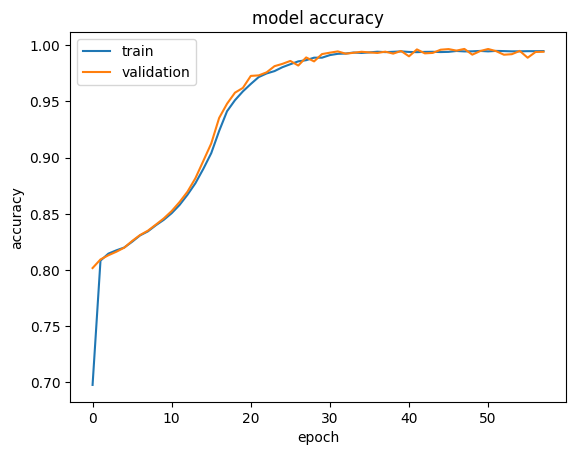

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

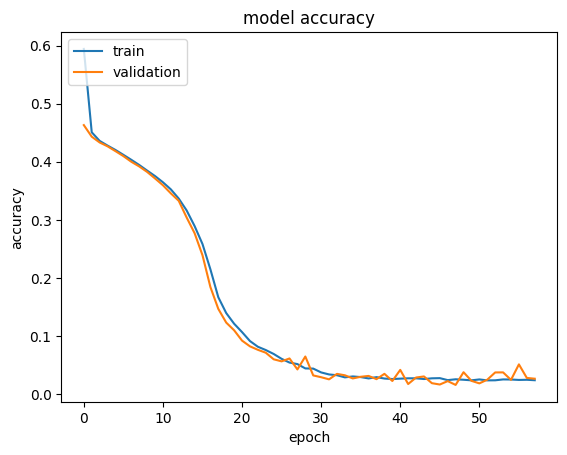

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()